<a href="https://colab.research.google.com/github/Ravneet7878/ML-Codes/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
plt.style.use("seaborn")

<ipython-input-2-26fe079a66dc>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
# Step - 1 :- Data Generation.

X, y = make_blobs(n_samples = 2000, centers = 2, cluster_std = 3, n_features = 2, random_state = 42)

n_features = 2

In [ ]:
# Step - 2 :- Data Visualization.

def visualization(X, y):
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = "viridis")
    plt.show()

In [ ]:
# Step - 3 :- Data Standardization.

def normalization(x):
    u = X.mean(axis = 0)
    std = X.std(axis = 0)
    ans = (X - u) / std

    return ans

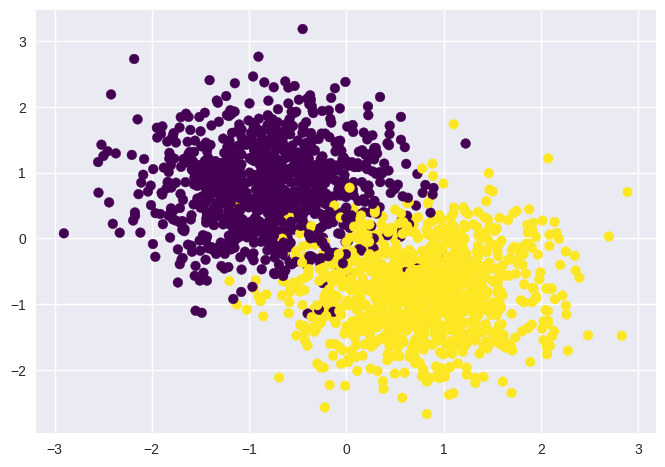

In [ ]:
X = normalization(X)
visualization(X, y)

In [ ]:
# Step - 4 :- Training & Testing The Data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 0)

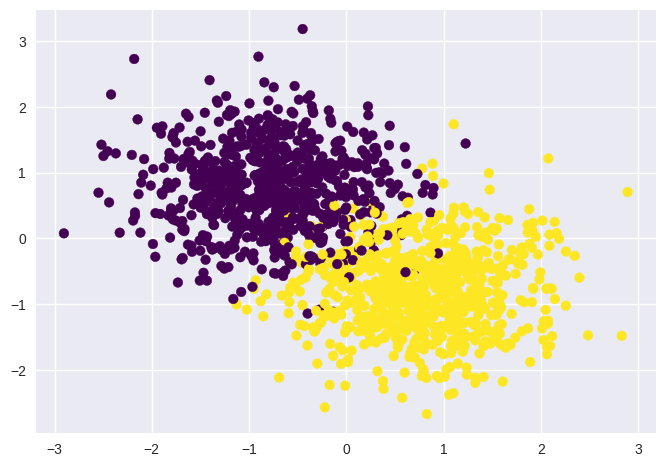

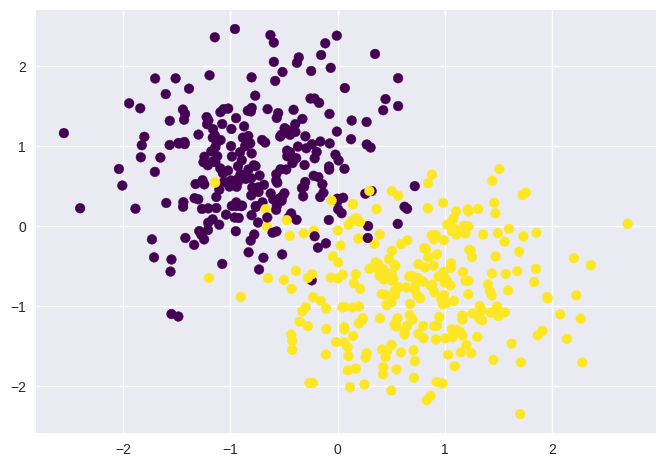

In [ ]:
visualization(X_train, y_train)
visualization(X_test, y_test)

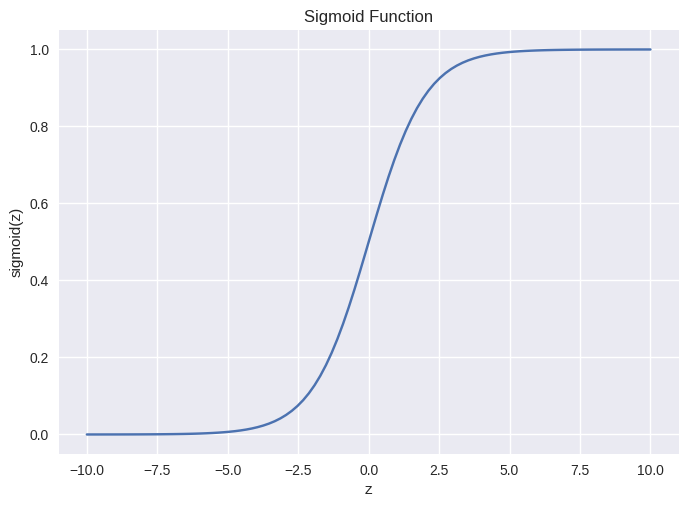

In [ ]:
# Sigmoid Function.

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.show()

In [ ]:
# Hypothesis Function.

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [ ]:
# Binary Cross Entropy Loss Function.

def error(y, y_hat):
    loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    return loss

In [ ]:
# Gradient Function.

def gradient(X, y, y_hat):
    m = X.shape[0]
    grad = -(1 / m) * np.dot(X.T, (y - y_hat))

    return grad

In [ ]:
# Preprocessing Of Data.

def preprocessing(X):
    if X.shape[1] == n_features:
        ones = np.ones((X.shape[0], 1))
        X = np.hstack((ones, X))

    return X

In [ ]:
# Training Function.

def train(X, y, learning_rate = 0.2):
    theta = np.random.randn(n_features + 1, 1)

    error_list = []

    for i in range(1000):
        y_hat = hypothesis(X, theta)
        loss = error(y, y_hat)
        error_list.append(loss)
        grad = gradient(X, y, y_hat)
        theta = theta - learning_rate * grad

    plt.plot(error_list)
    plt.title("Loss Function")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    return theta

In [ ]:
# Prediction/Labelling Function.

def predict(X, theta):
    y_hat = hypothesis(X, theta)
    pred = np.zeros((X.shape[0], 1), dtype = "int")
    pred[y_hat >= 0.5] = 1

    return pred

In [ ]:
# Accuracy Function.

def accuracy(X, y, theta):
    pred = predict(X, theta)

    return ((pred == y).sum()) / y.shape[0] * 100

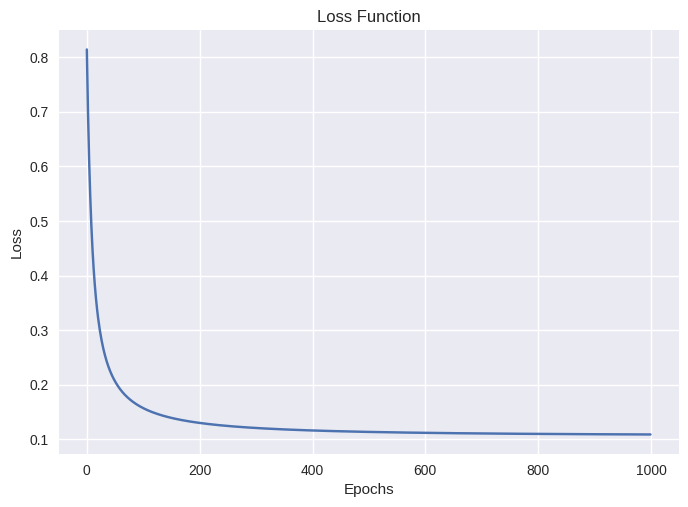

In [ ]:
X_train = preprocessing(X_train)
X_test = preprocessing(X_test)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

theta = train(X_train, y_train)

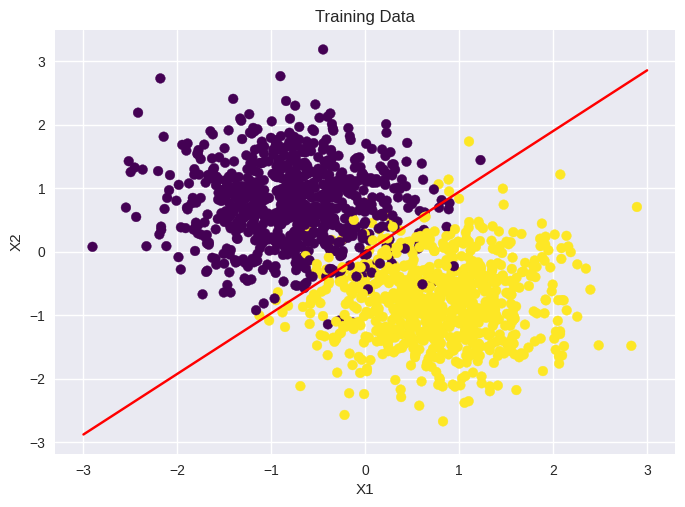

In [ ]:
plt.scatter(X_train[:, 1], X_train[:, 2], c = y_train, cmap = "viridis")
x1 =  np.linspace(-3, 3, 6)
x2 = -(theta[0] + theta[1] * x1) / theta[2]
plt.plot(x1, x2, color = "red")
plt.title("Training Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [ ]:
hypothesis(X_test, theta)
predict(X_test, theta)
print(accuracy(X_train, y_train, theta))
print(accuracy(X_test, y_test, theta))

96.06666666666666
95.8
